<a href="https://colab.research.google.com/github/jackty9/Treemap_Python/blob/main/CMC_API_treemap_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API call to data from CMC

In [ ]:
  #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '#REPLACE YOUR API KEY HERE#',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

{'status': {'timestamp': '2021-03-09T15:01:59.850Z', 'error_code': 0, 'error_message': None, 'elapsed': 12, 'credit_count': 1, 'notice': None, 'total_count': 4272}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9810, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channels', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio'], 'max_supply': 21000000, 'circulating_supply': 18649162, 'total_supply': 18649162, 'platform': None, 'cmc_rank': 1, 'last_updated': '2021-03-09T14:59:02.000Z', 'quote': {'USD': {'price': 54565.080608644785, 'volume_24h': 53360910710.16666, 'percent_change_1h': 1.47692765, 'percent_change_24h': 7.25386034, 'percent_change_7d': 11.29971562, 'percent_change_30d': 41.23158839, 'percent_change_60d': 31.82095972, 'percent_change_90d': 195.81069059, 'market_cap': 1017593027813.6752, 'last_updated': '2021-03-09T14:59:02.000Z

In [ ]:
import pandas as pd

#normalize the data into dataframe format
df = pd.json_normalize(data["data"])
cols_to_keep = ['name','symbol','cmc_rank','quote.USD.price','quote.USD.percent_change_24h','quote.USD.market_cap',]
df_final = df[cols_to_keep]
#rename columns
df_final.columns = ['name','symbol','cmc_rank','USD_price','USD_percent_change_24h','USD_market_cap',]
#print the table
df_final

,name,symbol,cmc_rank,USD_price,USD_percent_change_24h,USD_market_cap
0,Bitcoin,BTC,1,54565.080609,7.253860,1.017593e+12
1,Ethereum,ETH,2,1831.651479,5.759431,2.106022e+11
2,Binance Coin,BNB,3,274.750271,17.399715,4.245792e+10
3,Cardano,ADA,4,1.180530,5.511988,3.771594e+10
4,Tether,USDT,5,1.000711,0.014582,3.681993e+10
5,Polkadot,DOT,6,35.943073,5.290397,3.300334e+10
6,XRP,XRP,7,0.479320,0.893728,2.176307e+10
7,Uniswap,UNI,8,33.154949,-0.039572,1.728082e+10
8,Litecoin,LTC,9,199.249976,7.502189,1.327602e+10
9,Chainlink,LINK,10,30.930766,3.839472,1.272831e+10


# Squarify

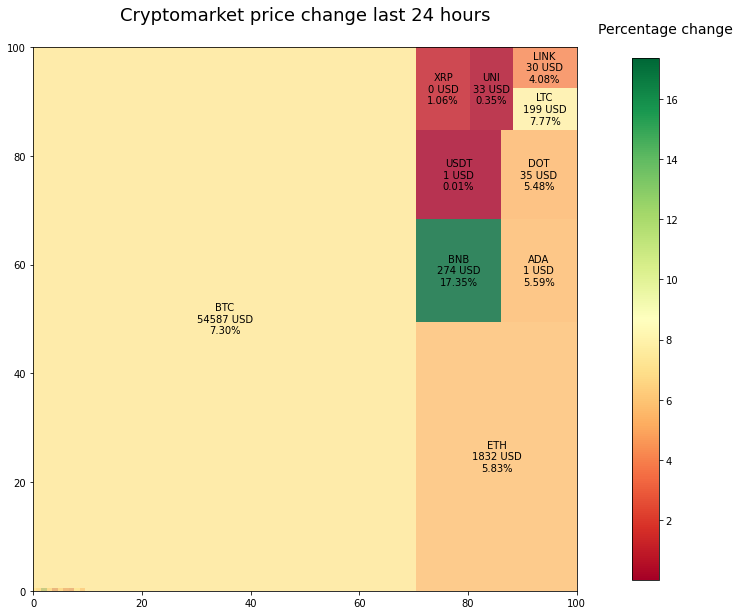

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
#!pip install squarify
import squarify 

#load data
sizes=df_final["USD_market_cap"]
label=df_final["name"]

# color scale on the price development 
# min and max values
cmap = matplotlib.cm.RdYlGn #RedYellowGreen
mini=min(df_final["USD_percent_change_24h"])
maxi=max(df_final["USD_percent_change_24h"])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in df_final["USD_percent_change_24h"]]

# labels in treemap squares
labels = ["%s\n%d USD\n%0.2f%%" % (label) for label in zip(df_final.symbol, df_final["USD_price"], df_final["USD_percent_change_24h"])]

# make plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, aspect="auto")
ax = squarify.plot(df_final["USD_market_cap"], color=colors, label=labels,  alpha=.8)
ax.set_title("Cryptomarket price change last 24 hours\n", fontsize=18)

# plot title and color bar
img = plt.imshow([df_final["USD_percent_change_24h"]], cmap=cmap)
img.set_visible(True)
fig.colorbar(img, orientation="vertical", shrink=.96)
fig.text(.76, .9, "Percentage change", fontsize=14)

# if you want to export the figure
#plt.savefig("cmc_treemaps.png")
plt.show()

#Plotly

In [ ]:
#!pip install --upgrade plotly
import plotly.graph_objects as go
import plotly.express as px

fig = px.treemap(df_final, 
                 path=['name'], 
                 values='USD_market_cap',
                 color_continuous_scale='RdYlGn',
                 color='USD_percent_change_24h',            
                 )
fig.update_layout(title_text='Cryptomarket price change last 24 hours', title_x=0.5)
fig.show()

In [ ]:
#BONUS
#To push your GC plot to Plotly Studio automatically
#!pip install chart_studio
import chart_studio 
import chart_studio.plotly as py

username = '#REPLACE YOUR USERNAME HERE#' # your username
api_key = '#REPLACE YOUR API KEY HERE#' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
py.plot(fig, filename = 'cmc_treemap', auto_open=True)

'https://plotly.com/~jackty92/11/'